In [15]:
# Author: Sam Joshua Caballero
# Date: 2025-06-13
# Description: This notebook automates the calculations done to generate SEO website performance reports of Jem Enterprise.

In [16]:
import pandas as pd
import os
import plotly.express as px

## User Inputs

In [17]:
month = "Insert month here"
gsc_file_queries = "GSC Input/queries.csv"
gsc_file_pages = "GSC Input/pages.csv"
gsc_file_countries = "GSC Input/countries.csv"
gsc_file_devices = "GSC Input/devices.csv"
ahrefs_keywords = "AHREFS Input/Ahrefs Keyword File"
ahrefs_pages = "AHREFS Input/Ahrefs Top Pages File"
save_csv_files = True
save_charts = True
output_folder = "Output"

# Process 1 A Configurations
top_ten = True
top_twenty = False
top_one_hundred = False
queries_with_most_clicks = 10 # options: 5, 10, 15, and 20
queries_with_most_impressions = 15 # options: 10, 15, 20

# Process 1/2 B Configurations 
top_5_best_performing_pages = True
top_5_worst_performing_pages = True

In [18]:
# === Main Process ===
try:
    df_queries = pd.read_csv(gsc_file_queries)
    df_pages = pd.read_csv(gsc_file_pages)
    df_countries = pd.read_csv(gsc_file_countries)
    df_devices = pd.read_csv(gsc_file_devices)
except FileNotFoundError:
    print(f"Error: File/s not found. Please check the file name or path.")
    exit()
except Exception as e:
    print(f"Error reading file: {e}")
    exit()

## Process 1: Google Search Console

### Process 1A (Output 1): Total Number of Queries

In [21]:
# Process
total_number_of_queries = df_queries.shape[0]

# Print Results
print(f"Total Number of Queries: {total_number_of_queries}")

# Save to TXT
if save_csv_files:
    os.makedirs(output_folder, exist_ok=True)
    with open(f'{output_folder}/1_GSC_Total_Queries.txt', 'w') as f:
        f.write(f"Total Number of Queries: {total_number_of_queries}\n")
    print(f"Saved to {output_folder}/1_GSC_Total_Queries.txt")

Total Number of Queries: 393
Saved to Output/1_GSC_Total_Queries.txt


### Process 1A (Outputs 2-4): Queries with average position 1-10, 11-20, and 21-100

In [23]:
# Process
def categorize_by_position(df_queries, top_ten=False, top_twenty=False, top_one_hundred=False):
    result = {}

    if top_ten:
        result['top_1_to_10'] = df_queries[(df_queries['Position'] >= 1) & (df_queries['Position'] <= 10)]

    if top_twenty:
        result['pos_11_to_20'] = df_queries[(df_queries['Position'] > 10) & (df_queries['Position'] <= 20)]

    if top_one_hundred:
        result['pos_21_to_100'] = df_queries[(df_queries['Position'] > 20) & (df_queries['Position'] <= 100)]

    return result
    
categories = categorize_by_position(df_queries, top_ten=True, top_twenty=True, top_one_hundred=True)

# Print Results
for label, data in categories.items():
    print(f"\nQueries/Keywords with Position Range: {label.replace('_', ' ').title()}")
    print(data.shape[0])

# Save to CSV
if save_csv_files:
    os.makedirs(output_folder, exist_ok=True) 
    categories['top_1_to_10'].to_csv(f'{output_folder}/2_GSC_Rank_1_to_10_Queries.csv', index=False)
    print(f"Saved to {output_folder}/2_GSC_Rank_1_to_10_Queries.csv")
    categories['pos_11_to_20'].to_csv(f'{output_folder}/3_GSC_Rank_11_to_20_Queries.csv', index=False)
    print(f"Saved to {output_folder}/3_GSC_Rank_11_to_20_Queries.csv")
    categories['pos_21_to_100'].to_csv(f'{output_folder}/4_GSC_Rank_11_to_20_Queries.csv', index=False)
    print(f"Saved to {output_folder}/4_GSC_Rank_11_to_20_Queries.csv")


Queries/Keywords with Position Range: Top 1 To 10
2

Queries/Keywords with Position Range: Pos 11 To 20
11

Queries/Keywords with Position Range: Pos 21 To 100
379
Saved to Output/2_GSC_Rank_1_to_10_Queries.csv
Saved to Output/3_GSC_Rank_11_to_20_Queries.csv
Saved to Output/4_GSC_Rank_11_to_20_Queries.csv


### Process 1A (Outputs 5): Top x queries with the most clicks

In [24]:
# Process
def get_top_queries_by_clicks(df_queries, queries_with_most_clicks=10):
    top_clicks_df = df_queries.sort_values(by='Clicks', ascending=False).head(queries_with_most_clicks)
    return top_clicks_df

top_clicks = get_top_queries_by_clicks(df_queries, queries_with_most_clicks)
top_clicks = top_clicks.reset_index(drop=True)
top_clicks.insert(0, 'Rank', top_clicks.index + 1)

# Print Results
print(f"\nTop {queries_with_most_clicks} Queries with the Most Clicks:")
print(top_clicks[['Rank', 'Top queries', 'Impressions', 'Clicks', 'CTR', 'Position']])

# Save to CSV
if save_csv_files:
    os.makedirs(output_folder, exist_ok=True) 
    top_clicks.to_csv(f'{output_folder}/5_GSC_Top_{queries_with_most_clicks}_Queries_By_Clicks.csv', index=False)
    print(f"Saved to {output_folder}/5_GSC_Top_{queries_with_most_clicks}_Queries_By_Clicks.csv")


Top 10 Queries with the Most Clicks:
   Rank                               Top queries  Impressions  Clicks    CTR  \
0     1            how many lights for a 6ft tree          324       1  0.31%   
1     2                   flocked christmas trees          381       0     0%   
2     3          what is a flocked christmas tree          304       0     0%   
3     4  how many lights for a 6ft christmas tree          176       0     0%   
4     5        how many lights for christmas tree          169       0     0%   
5     6                    what is a flocked tree          162       0     0%   
6     7                     unlit christmas trees          158       0     0%   
7     8    how to decorate a white christmas tree          152       0     0%   
8     9         frosted vs flocked christmas tree          142       0     0%   
9    10                    flocked christmas tree          141       0     0%   

   Position  
0     31.32  
1     58.41  
2     44.37  
3     33.37  


### Process 1A (Outputs 6): Top x queries with the most impressions

In [25]:
# Process
def get_top_queries_by_impressions(df_queries, queries_with_most_impressions=15):
    top_impressions_df = df_queries.sort_values(by='Impressions', ascending=False).head(queries_with_most_impressions)
    return top_impressions_df

top_impressions = get_top_queries_by_impressions(df_queries, queries_with_most_impressions)
top_impressions = top_impressions.reset_index(drop=True)
top_impressions.insert(0, 'Rank', top_impressions.index + 1)

# Print Results
print(f"\nTop {queries_with_most_impressions} Queries with the Most Impressions:")
print(top_impressions[['Rank', 'Top queries', 'Impressions', 'Clicks', 'CTR', 'Position']])

# Save to CSV
if save_csv_files:
    os.makedirs(output_folder, exist_ok=True)  
    top_impressions.to_csv(f'{output_folder}/6_GSC_Top_{queries_with_most_impressions}_Queries_By_Impressions.csv', index=False)
    print(f"Saved to {output_folder}/6_GSC_Top_{queries_with_most_impressions}_Queries_By_Impressions.csv")


Top 15 Queries with the Most Impressions:
    Rank                               Top queries  Impressions  Clicks  \
0      1                   flocked christmas trees          381       0   
1      2            how many lights for a 6ft tree          324       1   
2      3          what is a flocked christmas tree          304       0   
3      4  how many lights for a 6ft christmas tree          176       0   
4      5        how many lights for christmas tree          169       0   
5      6                    what is a flocked tree          162       0   
6      7                     unlit christmas trees          158       0   
7      8    how to decorate a white christmas tree          152       0   
8      9         frosted vs flocked christmas tree          142       0   
9     10                    flocked christmas tree          141       0   
10    11                      white christmas tree          134       0   
11    12            what is flocked christmas tree       

## Process 1B (Outputs 1-2) Top performing pages

In [26]:
def extract_top_performing_pages(
    output_folder,
    top_5_best_performing_pages=False,
    save_csv_files=False
):

    # Process
    top_page = df_pages.head(1)
    top_5_pages = df_pages.head(5) if top_5_best_performing_pages else None

    # Print Results
    print("Top Performing Page:")
    print(top_page)
    
    if top_5_best_performing_pages:
        print("\nTop 5 Performing Pages:")
        print(top_5_pages)

    # Save to CSV
    if save_csv_files:
        os.makedirs(output_folder, exist_ok=True)  # Ensure the folder exists
        top_page.to_csv(f"{output_folder}/7_GSC_top_performing_page.csv", index=False)
        print(f"\nSaved to {output_folder}/7_GSC_top_performing_page.csv")

        if top_5_best_performing_pages:
            top_5_pages.to_csv(f"{output_folder}/8_GSC_top_5_performing_pages.csv", index=False)
            print(f"Saved to {output_folder}/8_GSC_top_5_performing_pages.csv")

    return top_page, top_5_pages

top_page, top_5_pages = extract_top_performing_pages(output_folder, top_5_best_performing_pages, save_csv_files)

Top Performing Page:
                                           Top pages  Clicks  Impressions  \
0  https://hearthfir.com/blogs/hearth-fir-blog/ho...       1         2373   

     CTR  Position  
0  0.04%     41.71  

Top 5 Performing Pages:
                                           Top pages  Clicks  Impressions  \
0  https://hearthfir.com/blogs/hearth-fir-blog/ho...       1         2373   
1              https://hearthfir.com/collections/all       1          137   
2   https://hearthfir.com/collections/special-offers       1            8   
3  https://hearthfir.com/blogs/hearth-fir-blog/fl...       0         1190   
4  https://hearthfir.com/blogs/hearth-fir-blog/ch...       0          913   

     CTR  Position  
0  0.04%     41.71  
1  0.73%     63.29  
2  12.5%     11.25  
3     0%     35.82  
4     0%     49.26  

Saved to Output/7_GSC_top_performing_page.csv
Saved to Output/8_GSC_top_5_performing_pages.csv


## Process 1B (Outputs 3-4) Underperforming performing pages

In [27]:
def extract_underperforming_performing_pages(
    output_folder,
    top_5_worst_performing_pages=False,
    save_csv_files=False
):

    # Process
    bottom_page = df_pages.tail(1)
    bottom_5_pages = df_pages.tail(5) if top_5_worst_performing_pages else None

    # Print Results
    print("Worst Performing Page:")
    print(bottom_page)
    
    if top_5_worst_performing_pages:
        print("\nBottom 5 Performing Pages:")
        print(bottom_5_pages)

    # Save to CSV
    if save_csv_files:
        os.makedirs(output_folder, exist_ok=True)  
        bottom_page.to_csv(f"{output_folder}/9_GSC_worst_performing_page.csv", index=False)
        print(f"\nSaved to {output_folder}/9_GSC_worst_performing_page.csv")

        if top_5_worst_performing_pages:
            bottom_5_pages.to_csv(f"{output_folder}/10_GSC_bottom_5_performing_pages.csv", index=False)
            print(f"Saved to {output_folder}/10_GSC_bottom_5_performing_pages.csv")

    return bottom_page, bottom_5_pages

bottom_page, bottom_5_pages = extract_underperforming_performing_pages(output_folder, top_5_worst_performing_pages, save_csv_files)

Worst Performing Page:
                                           Top pages  Clicks  Impressions CTR  \
51  https://hearthfir.com/products/9-ft-flocked-tree       0            1  0%   

    Position  
51      19.0  

Bottom 5 Performing Pages:
                                            Top pages  Clicks  Impressions  \
47  https://hearthfir.com/collections/under-6-ft-a...       0            1   
48      https://hearthfir.com/pages/pipeda-compliance       0            1   
49  https://hearthfir.com/products/7-ft-pre-lit-mixed       0            1   
50    https://hearthfir.com/products/7-ft-unlit-mixed       0            1   
51   https://hearthfir.com/products/9-ft-flocked-tree       0            1   

   CTR  Position  
47  0%       5.0  
48  0%       5.0  
49  0%       5.0  
50  0%      10.0  
51  0%      19.0  

Saved to Output/9_GSC_worst_performing_page.csv
Saved to Output/10_GSC_bottom_5_performing_pages.csv


## Process 1C (Output 1) Top 5 Countries

In [28]:
def extract_top_countries(
    output_folder,
    save_csv_files=False
):

    # Process
    top_countries = df_countries.head(5)

    # Print Results
    print("Top 5 Countries:")
    print(top_countries)

    # Save to CSV
    if save_csv_files:
        os.makedirs(output_folder, exist_ok=True)  
        top_countries.to_csv(f"{output_folder}/11_GSC_top_countries.csv", index=False)
        print(f"\nSaved to {output_folder}/11_GSC_top_countries.csv")

    return top_countries

top_countries = extract_top_countries(output_folder, save_csv_files)

Top 5 Countries:
          Country  Clicks  Impressions    CTR  Position
0     Philippines       3           67  4.48%     40.91
1   United States       0         4007     0%     43.57
2          Brazil       0         1281     0%     42.95
3          Canada       0          488     0%     55.28
4  United Kingdom       0          419     0%     46.76

Saved to Output/11_GSC_top_countries.csv


## Process 1D (Output 1) Pie Chart for Clicks by Device Type

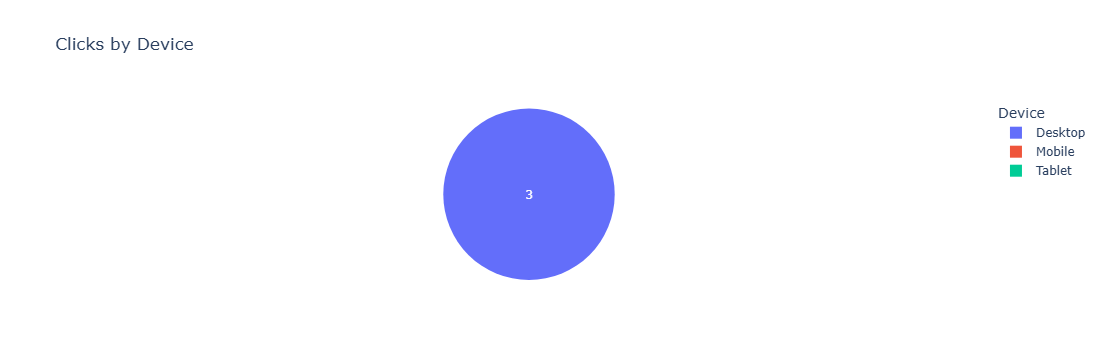

Saved to Output\12_GSC_Clicks_By_Device.png


In [30]:
def plot_clicks_by_device(output_folder=".", save_charts=False):

    # Process
    fig = px.pie(
        df_devices,
        names="Device",
        values="Clicks",
        title="Clicks by Device",
        hole=0,  
    )
    
    fig.update_traces(
        textinfo='value',  
        textposition='inside',
        pull=[0.05]*len(df_devices),  
        insidetextorientation='auto',
        showlegend=True
    )

    fig.update_layout(
        uniformtext_minsize=12,
        uniformtext_mode='hide',
        legend_title_text="Device",
    )
    
    # Print Results
    fig.show()

    # Save Chart
    if save_charts:
        os.makedirs(output_folder, exist_ok=True)
        file_path = os.path.join(output_folder, "12_GSC_Clicks_By_Device.png")
        fig.write_image(file_path)
        print(f"Saved to {file_path}")

plot_clicks_by_device(output_folder="Output", save_charts=True)

## Process 1D (Output 2) Pie Chart for Impressions by Device Type

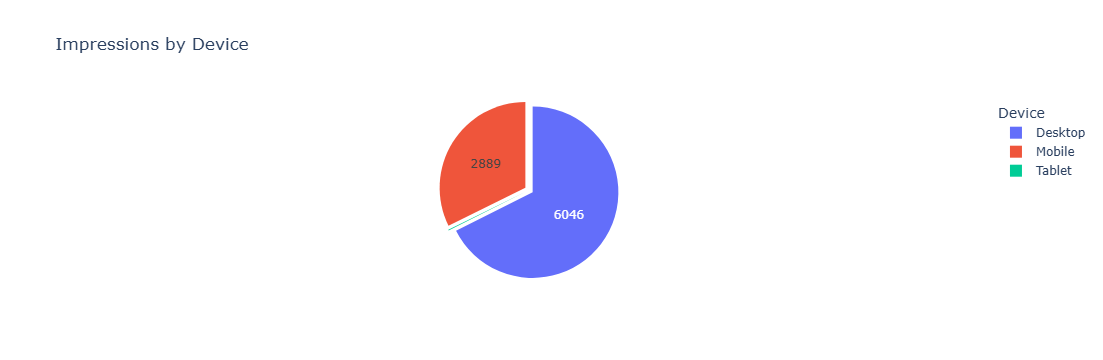

Saved to Output\13_GSC_Impressions_By_Device.png


In [31]:
def plot_impressions_by_device(output_folder=".", save_charts=False):

    # Process
    fig = px.pie(
        df_devices,
        names="Device",
        values="Impressions",
        title="Impressions by Device",
        hole=0, 
    )
    
    fig.update_traces(
        textinfo='value',  
        textposition='inside',
        pull=[0.05]*len(df_devices),  
        insidetextorientation='auto',
        showlegend=True
    )

    fig.update_layout(
        uniformtext_minsize=12,
        uniformtext_mode='hide',
        legend_title_text="Device",
    )

    # Print Results
    fig.show()

    # Save Chart
    if save_charts:
        os.makedirs(output_folder, exist_ok=True)
        file_path = os.path.join(output_folder, "13_GSC_Impressions_By_Device.png")
        fig.write_image(file_path)
        print(f"Saved to {file_path}")

plot_impressions_by_device(output_folder="Output", save_charts=True)